# Read in Data

In [733]:
# ================================================================================
# Splitting training and test sets
# ================================================================================

import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv('WAGE2_2025_abridged.csv')

state= (540491669 + 540712391 + 540575497 + 540750669 + 540744934)   # replace this number with the sum of the student IDs for the members of your group

train = data.sample(frac=0.8, random_state=state)
test = data[data.index.isin(train.index)==False].copy() # Only for prediction

train=train.reset_index(drop=True)
test=test.reset_index(drop=True)

In [734]:
train.head()

wage  hours   IQ  KWW  educ  exper  tenure  age  married  black  south  \
0  1160     40   92   32    12      8       8   31        1      0      0   
1   722     55  113   36    16      8       1   38        0      0      1   
2  1160     40   84   35    12     17       2   38        1      0      0   
3  1000     50  104   36    16     11       8   30        1      0      0   
4   978     48  104   36    12     19      15   36        1      0      0   

   urban  sibs  brthord  meduc  feduc     lwage  
0      0     4      1.0   12.0   11.0  7.056175  
1      1     1      2.0    8.0    NaN  6.582025  
2      0     4      2.0   16.0   12.0  7.056175  
3      1     1      1.0   12.0   11.0  6.907755  
4      1     5      6.0    6.0    NaN  6.885510

In [735]:
train.isnull().sum()

wage         0
hours        0
IQ           0
KWW          0
educ         0
exper        0
tenure       0
age          0
married      0
black        0
south        0
urban        0
sibs         0
brthord     62
meduc       56
feduc      152
lwage        0
dtype: int64

# **Task 1**

### Numerical Summaries ###

In [738]:
numerical = train[['wage', 'hours', 'IQ', 'KWW', 'educ', 'exper', 'tenure', 'age', 'sibs', 'meduc', 'feduc', 'lwage']]
numerical.describe().round(3)

wage    hours       IQ      KWW     educ    exper   tenure  \
count   733.000  733.000  733.000  733.000  733.000  733.000  733.000   
mean    962.921   44.082  101.854   35.801   13.501   11.487    7.235   
std     402.656    7.134   14.500    7.656    2.182    4.456    5.089   
min     200.000   20.000   54.000   12.000    9.000    1.000    0.000   
25%     675.000   40.000   93.000   31.000   12.000    8.000    3.000   
50%     910.000   40.000  103.000   37.000   12.000   11.000    7.000   
75%    1186.000   48.000  112.000   41.000   16.000   15.000   11.000   
max    3078.000   80.000  145.000   56.000   18.000   23.000   22.000   

           age     sibs    meduc    feduc    lwage  
count  733.000  733.000  677.000  581.000  733.000  
mean    33.034    2.898   10.703   10.176    6.787  
std      3.122    2.199    2.843    3.317    0.412  
min     28.000    0.000    0.000    0.000    5.298  
25%     30.000    1.000    8.000    8.000    6.515  
50%     33.000    2.000   12.000   10.000    6.813  
75%     36.000    4.000   12.000   12.000    7.078  
max     38.000   14.000   18.000   18.000    8.032

### Categorical summaries ###

In [740]:
tab=pd.crosstab(data['married'], columns="count");tab

col_0    count
married       
0           98
1          818

In [741]:
tab=pd.crosstab(data['black'], columns="count");tab

col_0  count
black       
0        807
1        109

In [742]:
tab=pd.crosstab(data['south'], columns="count");tab

col_0  count
south       
0        608
1        308

In [743]:
tab=pd.crosstab(data['urban'], columns="count");tab

col_0  count
urban       
0        256
1        660

In [744]:
tab=pd.crosstab(data['brthord'], columns="count");tab

col_0    count
brthord       
1.0        339
2.0        237
3.0        125
4.0         56
5.0         33
6.0         28
7.0          8
8.0          5
9.0          2
10.0         3

### Visuals ###

<Axes: xlabel='wage'>

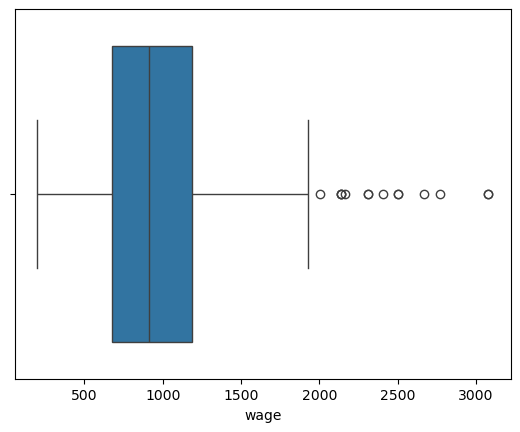

In [746]:
sns.boxplot(x=train['wage'])

<Axes: xlabel='married', ylabel='wage'>

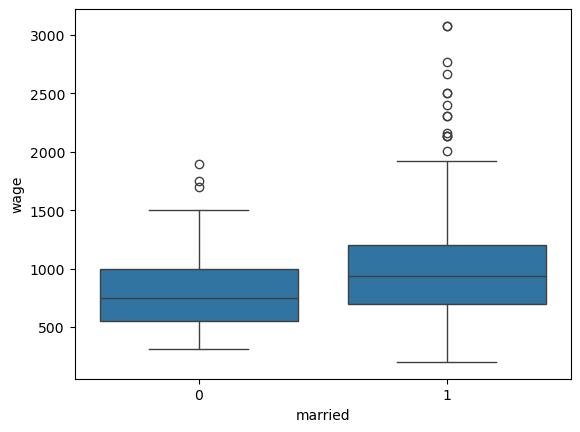

In [747]:
sns.boxplot(x='married', y='wage', data=train)

<Axes: xlabel='black', ylabel='wage'>

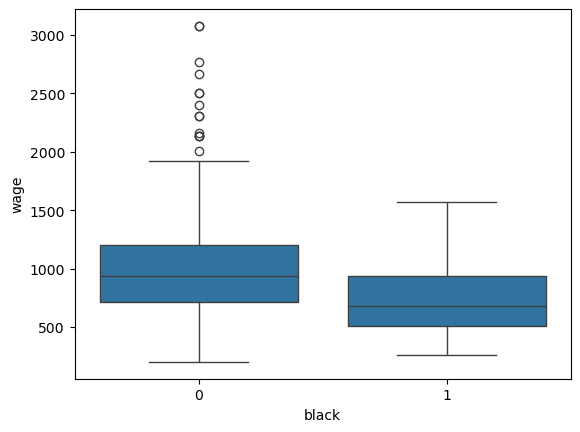

In [748]:
sns.boxplot(x='black', y='wage', data=train)

In [749]:
print(data.groupby('south')['wage'].mean())

south
0    1006.052632
1     868.993506
Name: wage, dtype: float64


In [750]:
print(data.groupby('urban')['wage'].mean())

urban
0     832.332031
1    1009.474242
Name: wage, dtype: float64


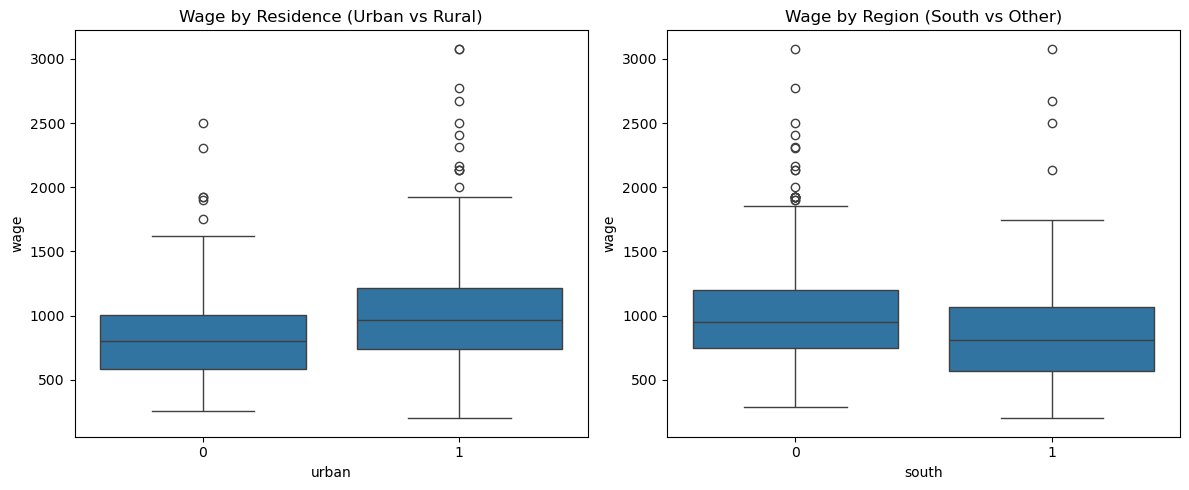

In [751]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Boxplot 1: Urban vs Rural
sns.boxplot(x='urban', y='wage', data=train, ax=axes[0])
axes[0].set_title("Wage by Residence (Urban vs Rural)")

# Boxplot 2: South vs Other
sns.boxplot(x='south', y='wage', data=train, ax=axes[1])
axes[1].set_title("Wage by Region (South vs Other)")

plt.tight_layout()
plt.savefig('region wage.png')
plt.show()

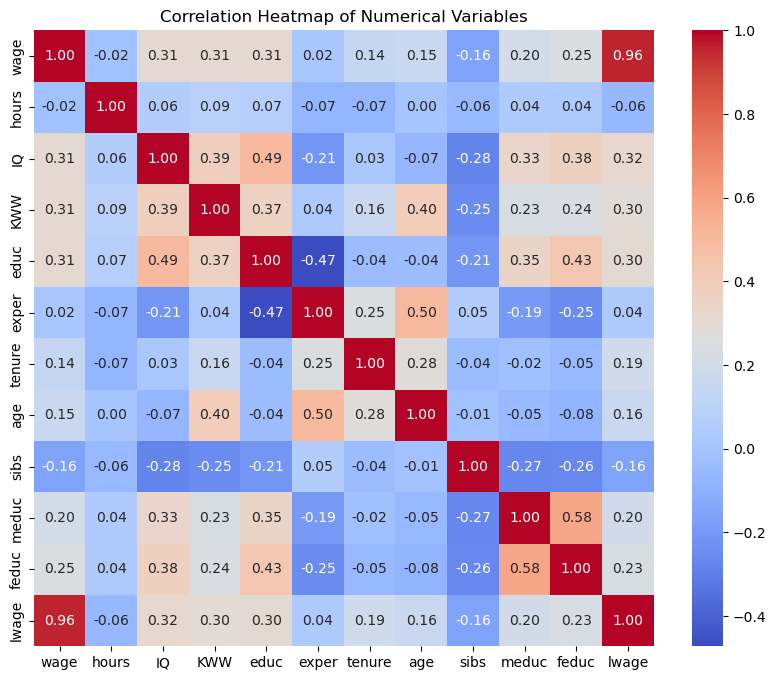

In [752]:
corr_matrix = numerical.corr()

plt.figure(figsize=(10, 8))  # Optional: adjust size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Variables")
plt.savefig('heatmap all var.png')
plt.show()

### Comparing education in sub groups ###

In [754]:
print(data.groupby('south')['educ'].mean())

south
0    13.648026
1    13.185065
Name: educ, dtype: float64


In [755]:
print(data.groupby('urban')['educ'].mean())

urban
0    13.238281
1    13.590909
Name: educ, dtype: float64


In [756]:
print(data.groupby('black')['educ'].mean())

black
0    13.629492
1    12.477064
Name: educ, dtype: float64


In [757]:
print(data.groupby('married')['educ'].mean())

married
0    13.846939
1    13.449878
Name: educ, dtype: float64


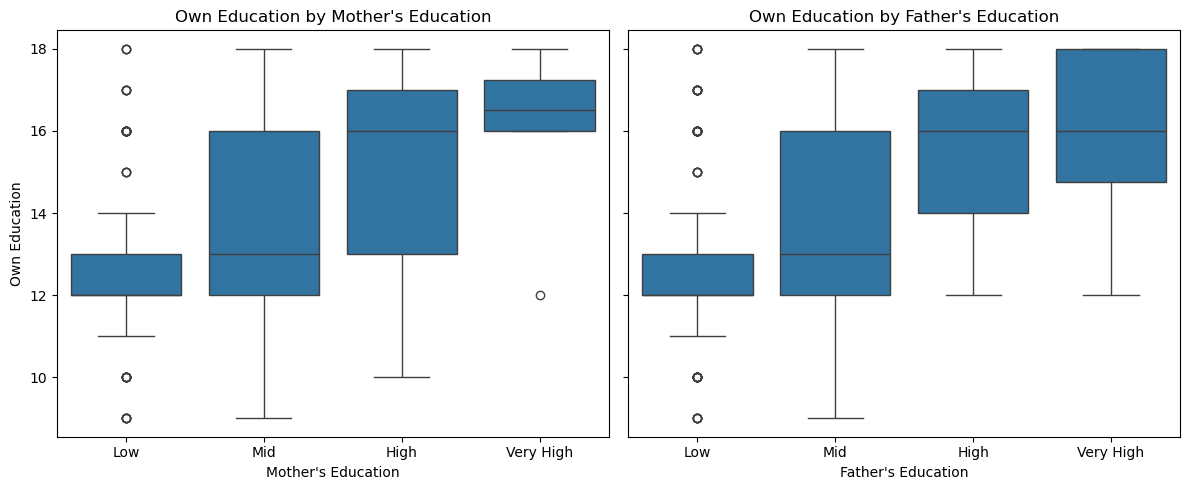

In [758]:
# Create bins for mother and father education
train['meduc_bin'] = pd.cut(train['meduc'], bins=[0, 8, 12, 16, 20], labels=['Low', 'Mid', 'High', 'Very High'])
train['feduc_bin'] = pd.cut(train['feduc'], bins=[0, 8, 12, 16, 20], labels=['Low', 'Mid', 'High', 'Very High'])

# Set up side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Mother's education
sns.boxplot(x='meduc_bin', y='educ', data=train, ax=axes[0])
axes[0].set_title("Own Education by Mother's Education")
axes[0].set_xlabel("Mother's Education")
axes[0].set_ylabel("Own Education")

# Father's education
sns.boxplot(x='feduc_bin', y='educ', data=train, ax=axes[1])
axes[1].set_title("Own Education by Father's Education")
axes[1].set_xlabel("Father's Education")
axes[1].set_ylabel("")

plt.tight_layout()
plt.savefig('parental education vs own education.png')
plt.show()

# **Task 2**

### MLR of education and experience on wage

In [761]:
t2_model = smf.ols('wage ~ educ + exper', data=train)
t2_reg = t2_model.fit()
t2_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     55.84
Date:                Thu, 22 May 2025   Prob (F-statistic):           2.72e-23
Time:                        13:31:04   Log-Likelihood:                -5384.0
No. Observations:                 733   AIC:                         1.077e+04
Df Residuals:                     730   BIC:                         1.079e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -288.7780    122.739     -2.353      0.019    -529.742     -47.814
educ          76.1294      7.216     10.550      0.000      61.963      90.296
exper         19.4915      3.534      5.516      0.000      12.554      26.429
==============================================================================
Omnibus:                      191.273   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              647.797
Skew:                           1.221   Prob(JB):                    2.15e-141
Kurtosis:                       6.905   Cond. No.                         159.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [762]:
#Extracting Fitted Values and Residuals from the Regression Model
t2_fit = t2_reg.fittedvalues
t2_resid = t2_reg.resid

In [763]:
t2_reg.mse_resid**0.5

375.5059302119657

In [764]:
t2_reg_rob = t2_model.fit(cov_type = 'HC0')
t2_reg_rob.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     47.42
Date:                Thu, 22 May 2025   Prob (F-statistic):           4.36e-20
Time:                        13:31:04   Log-Likelihood:                -5384.0
No. Observations:                 733   AIC:                         1.077e+04
Df Residuals:                     730   BIC:                         1.079e+04
Df Model:                           2                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -288.7780    128.375     -2.249      0.024    -540.388     -37.168
educ          76.1294      7.848      9.700      0.000      60.747      91.512
exper         19.4915      3.479      5.603      0.000      12.673      26.310
==============================================================================
Omnibus:                      191.273   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              647.797
Skew:                           1.221   Prob(JB):                    2.15e-141
Kurtosis:                       6.905   Cond. No.                         159.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

After correcting for potential heteroskedasticity using HC1 robust standard errors, the model’s coefficients remained statistically significant, suggesting that the key relationships are robust. However, the increase in standard errors and the lower F-statistic indicate that inference under standard OLS may have understated uncertainty.

In [766]:
t2_slr_educ_model = smf.ols('wage ~ educ', data=train).fit()
t2_slr_educ_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     78.11
Date:                Thu, 22 May 2025   Prob (F-statistic):           7.21e-18
Time:                        13:31:04   Log-Likelihood:                -5399.0
No. Observations:                 733   AIC:                         1.080e+04
Df Residuals:                     731   BIC:                         1.081e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    188.8699     88.719      2.129      0.034      14.695     363.045
educ          57.3342      6.487      8.838      0.000      44.598      70.070
==============================================================================
Omnibus:                      179.416   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              550.454
Skew:                           1.179   Prob(JB):                    2.95e-120
Kurtosis:                       6.531   Cond. No.                         86.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [767]:
t2_slr_exper_model = smf.ols('wage ~ exper', data=train).fit()
t2_slr_exper_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3188
Date:                Thu, 22 May 2025   Prob (F-statistic):              0.572
Time:                        13:31:04   Log-Likelihood:                -5436.0
No. Observations:                 733   AIC:                         1.088e+04
Df Residuals:                     731   BIC:                         1.089e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    941.2470     41.168     22.863      0.000     860.425    1022.069
exper          1.8868      3.342      0.565      0.572      -4.673       8.447
==============================================================================
Omnibus:                      186.803   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              509.904
Skew:                           1.275   Prob(JB):                    1.89e-111
Kurtosis:                       6.193   Cond. No.                         34.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### LSA 1: Linearity

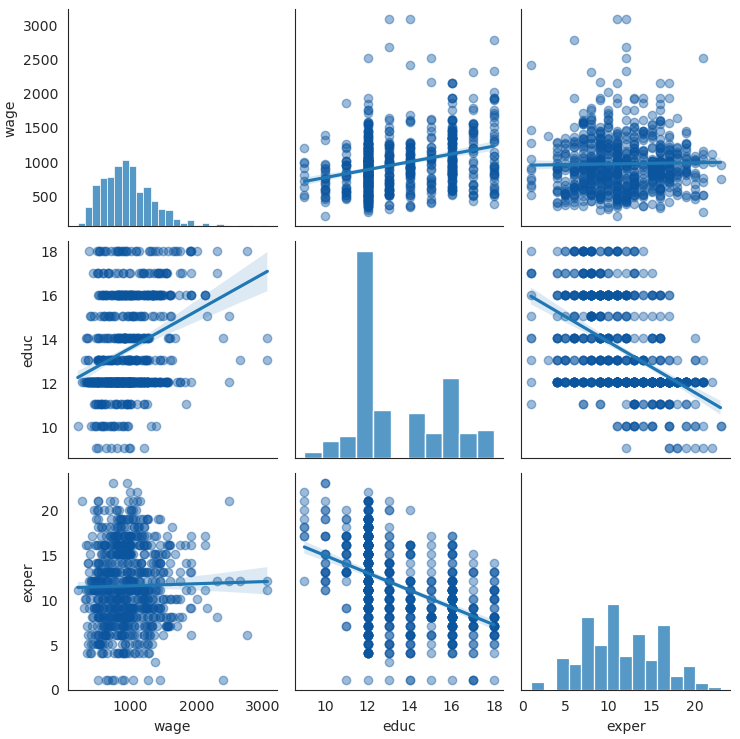

In [769]:

variables=['wage', 'educ', 'exper']
with sns.axes_style('white'):
    g=sns.pairplot(train[variables], kind='reg',
                   plot_kws={'scatter_kws' :{'color': sns.color_palette('Blues')[-1], 'alpha': 0.4}})
plt.tight_layout()

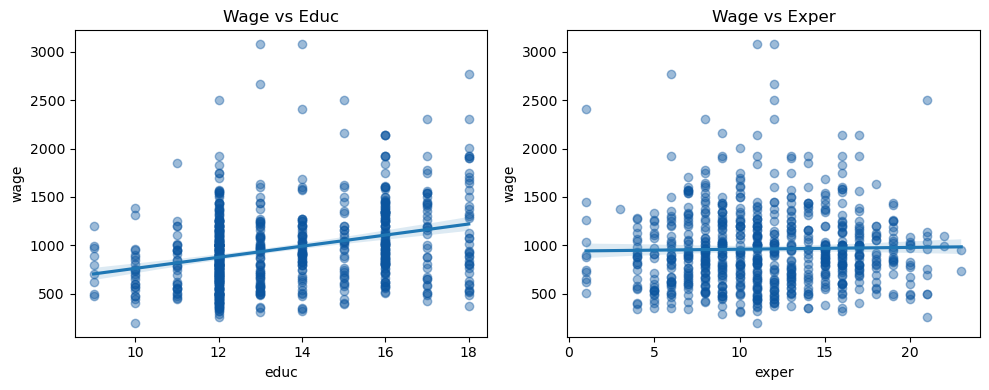

In [770]:
plt.figure(figsize=(10, 4))

# Top-middle: wage vs educ
plt.subplot(1, 2, 1)
sns.regplot(x='educ', y='wage', data=train,
            scatter_kws={'color': sns.color_palette('Blues')[-1], 'alpha': 0.4})
plt.title('Wage vs Educ')

# Top-right: wage vs exper
plt.subplot(1, 2, 2)
sns.regplot(x='exper', y='wage', data=train,
            scatter_kws={'color': sns.color_palette('Blues')[-1], 'alpha': 0.4})
plt.title('Wage vs Exper')

plt.tight_layout()
plt.show()

### LSA 2: Exogeneity

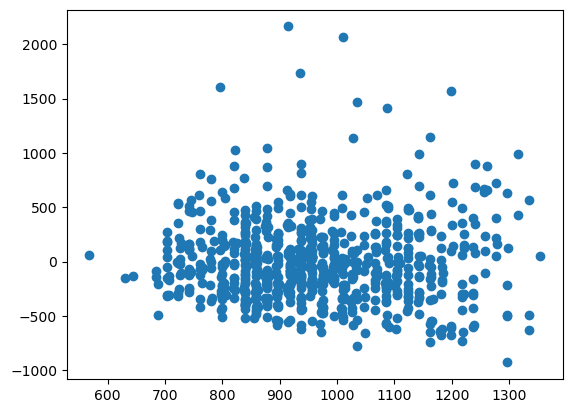

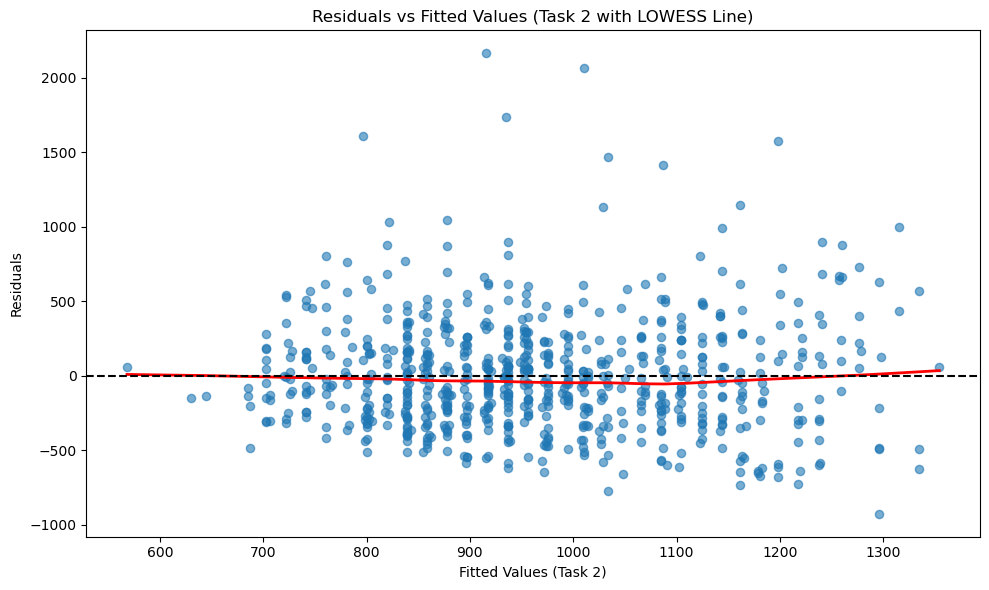

In [905]:
plt.scatter(t2_fit, t2_resid)
plt.figure(figsize=(10, 6))
sns.regplot(x=t2_fit, y=t2_resid, lowess=True,
            scatter_kws={'s': 35, 'alpha': 0.6},
            line_kws={'color': 'red', 'linewidth': 2})

plt.axhline(0, color='black', linestyle='--')
plt.xlabel("Fitted Values (Task 2)")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values (Task 2 with LOWESS Line)")
plt.tight_layout()
plt.savefig("t2_resid_vs_fitted_regplot.png", dpi=300)
plt.show()

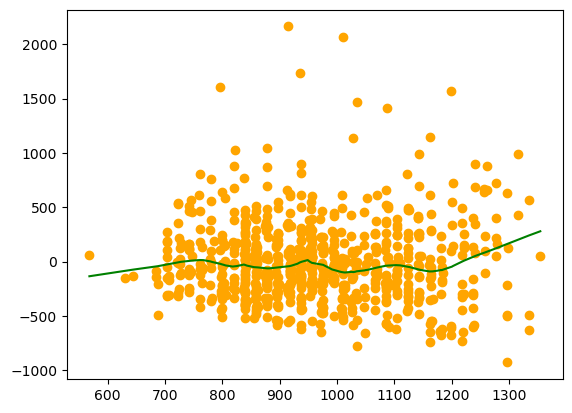

In [773]:
lowess = sm.nonparametric.lowess
plt.scatter(t2_fit, t2_resid, color='orange')
t2_z = lowess(t2_resid, t2_fit, frac=1./5)
plt.plot(t2_z[:,0],t2_z[:,1],'green')
plt.show()

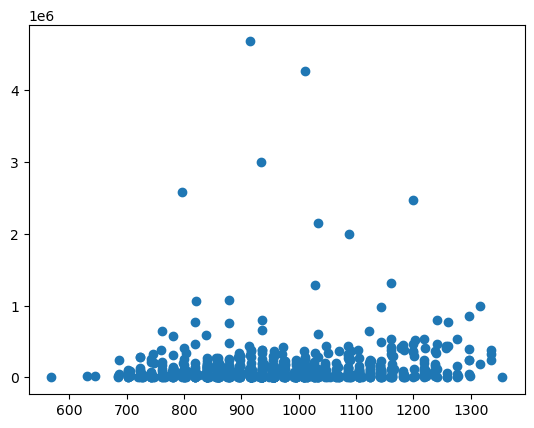

In [774]:
#Squared Residuals for MLR
t2_resid2=t2_reg.resid**2
plt.scatter(t2_fit, t2_resid2)
plt.show()

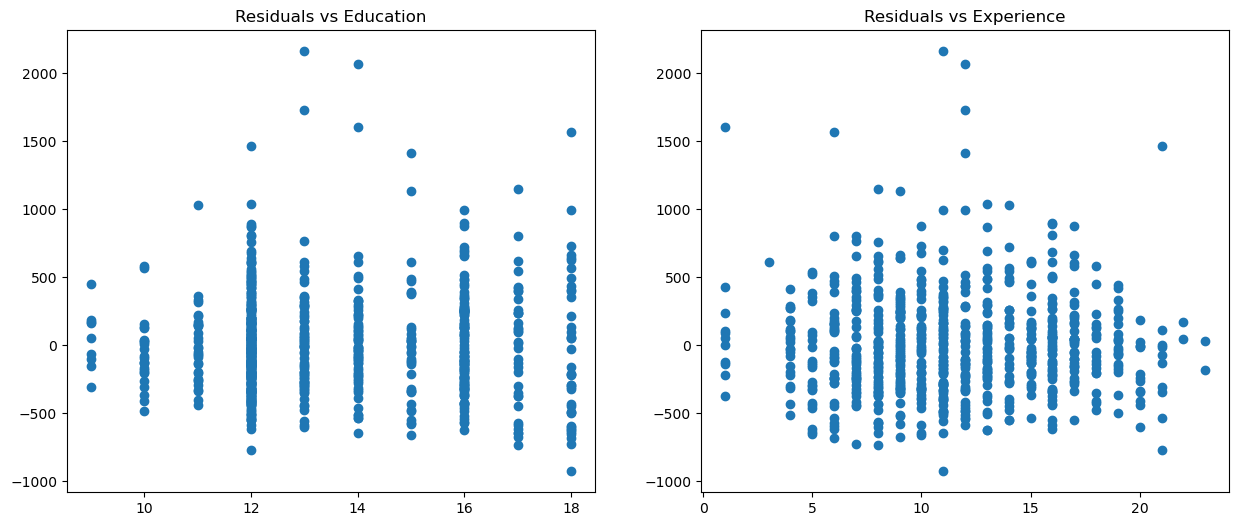

In [775]:
#Residuals against predictors
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.scatter(train['educ'], t2_resid)
ax1.set_title("Residuals vs Education")

ax2.scatter(train['exper'], t2_resid)
ax2.set_title("Residuals vs Experience")

plt.show()

### LSA 3: Data is IID

The data represent a cross-sectional survey of income earners, with each row corresponding to a distinct individual. Given that the observations are drawn independently from a population and reflect individual-level attributes, we assume the data satisfy LSA 3, the observations are independent and identically distributed.

### LSA 4: All 4th Moments Exist

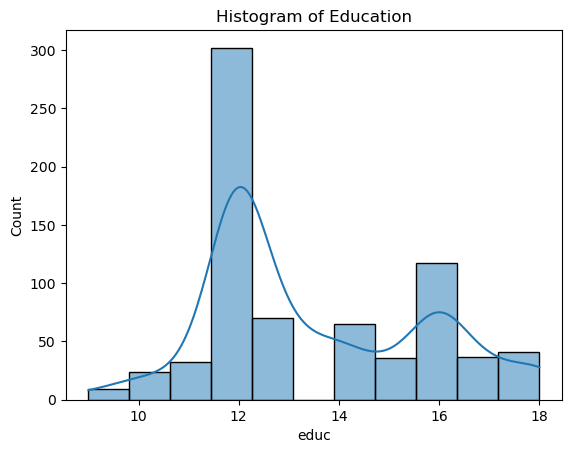

In [779]:
sns.histplot(train['educ'], kde=True)
plt.title("Histogram of Education")
plt.savefig('hist educ.png')
plt.show()

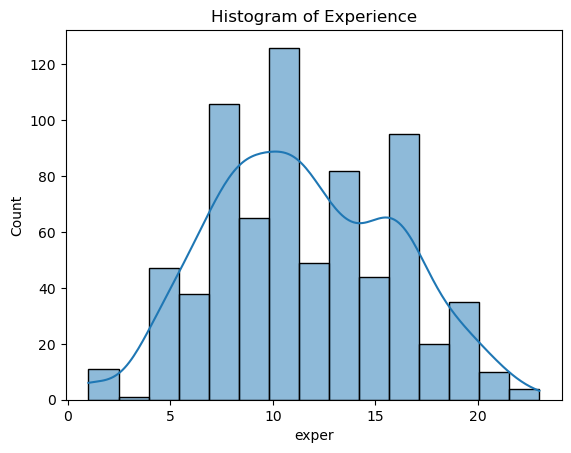

In [780]:
sns.histplot(train['exper'], kde=True)
plt.title("Histogram of Experience")
plt.savefig('hist exper.png')
plt.show()

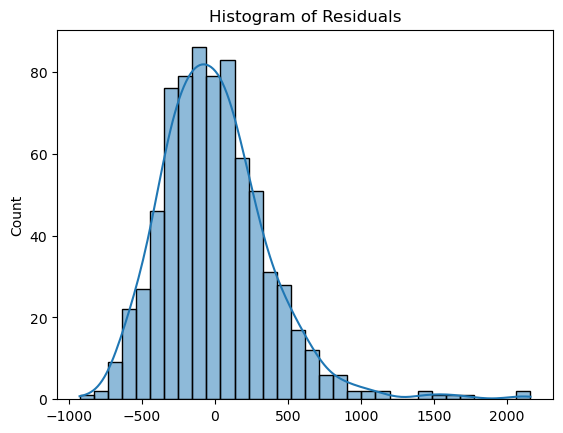

In [781]:
sns.histplot(t2_resid, kde=True)
plt.title("Histogram of Residuals")
plt.show()

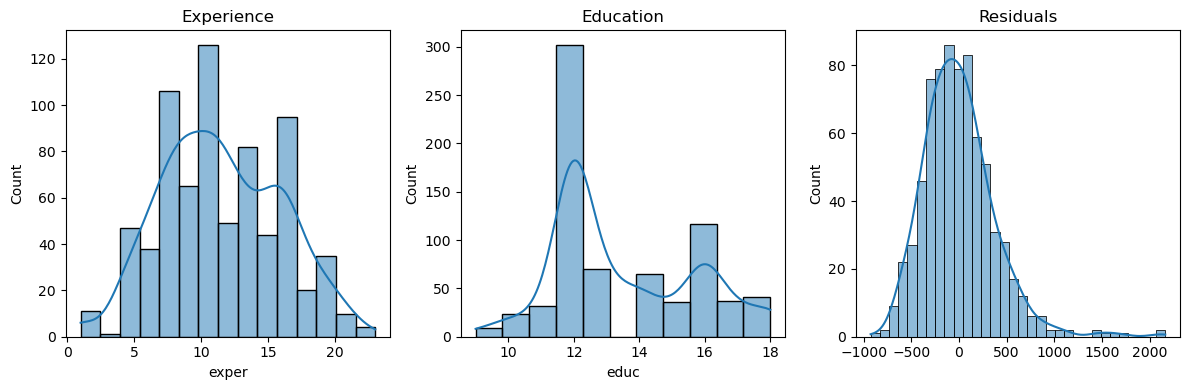

In [782]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))  # 1 row, 3 columns

sns.histplot(train['exper'], kde=True, ax=axes[0])
axes[0].set_title("Experience")

sns.histplot(train['educ'], kde=True, ax=axes[1])
axes[1].set_title("Education")

sns.histplot(t2_resid, kde=True, ax=axes[2])  
axes[2].set_title("Residuals")

plt.tight_layout()
plt.savefig("lsa4_histograms.png", dpi=300, bbox_inches='tight')

### LSA 5: No Perfect Collinearity

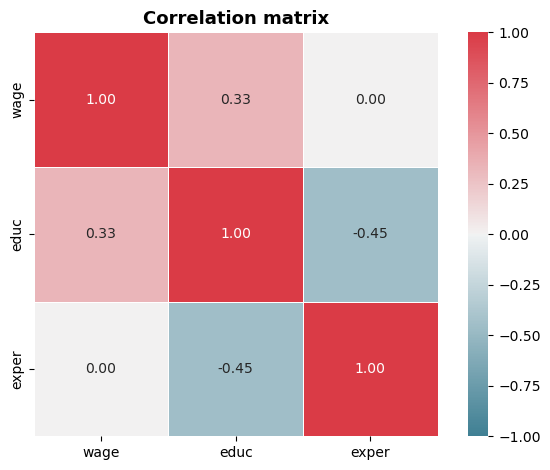

In [784]:
fig, ax = plt.subplots()
variables = ['wage', 'educ', 'exper']
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data[variables].corr(), vmax=1, vmin=-1, center=0, square=True, linewidths=0.5, annot=True, fmt='.2f', ax=ax, cmap=cmap)

ax.set_title('Correlation matrix', fontweight='bold', fontsize=13)
plt.tight_layout()
plt.savefig('correlation matrix.png')
plt.show()

### LSA 6: Homoskedacity

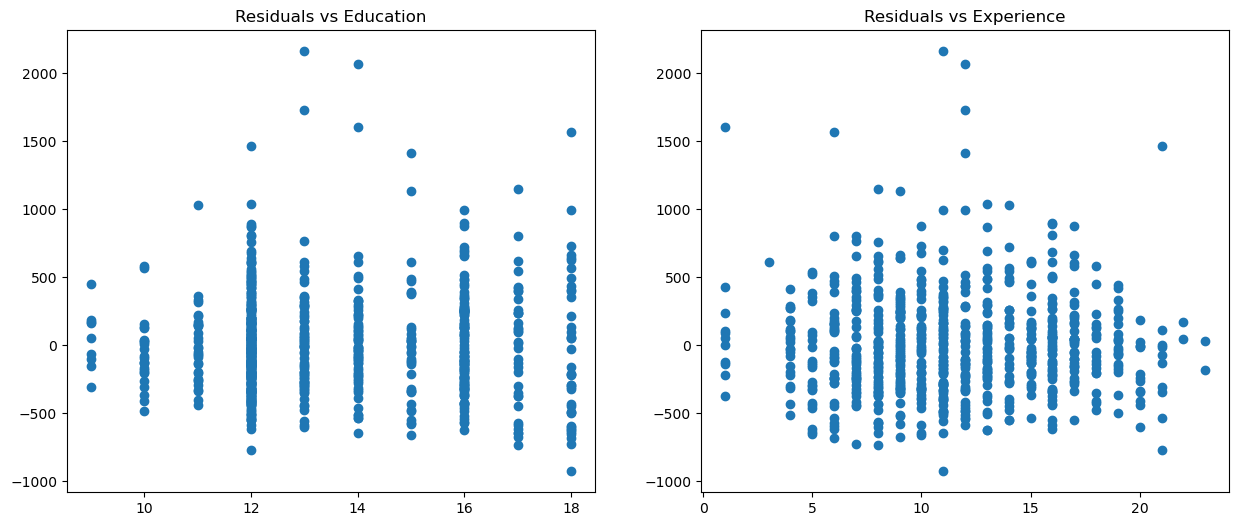

In [786]:
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.scatter(train['educ'], t2_resid)
ax1.set_title('Residuals vs Education')
ax2.scatter(train['exper'], t2_resid)
ax2.set_title('Residuals vs Experience')
plt.savefig('homoskedacity.png')
plt.show()

# **Task 3**

### Relationship between Wage and Education, and Wage and Experience ###

In [789]:
t3_slr_educ_model = smf.ols('wage ~ educ', data=train).fit()
t3_slr_educ_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     78.11
Date:                Thu, 22 May 2025   Prob (F-statistic):           7.21e-18
Time:                        13:31:07   Log-Likelihood:                -5399.0
No. Observations:                 733   AIC:                         1.080e+04
Df Residuals:                     731   BIC:                         1.081e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    188.8699     88.719      2.129      0.034      14.695     363.045
educ          57.3342      6.487      8.838      0.000      44.598      70.070
==============================================================================
Omnibus:                      179.416   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              550.454
Skew:                           1.179   Prob(JB):                    2.95e-120
Kurtosis:                       6.531   Cond. No.                         86.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [790]:
t2_slr_exper_model = smf.ols('wage ~ exper', data=train).fit()
t2_slr_exper_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3188
Date:                Thu, 22 May 2025   Prob (F-statistic):              0.572
Time:                        13:31:07   Log-Likelihood:                -5436.0
No. Observations:                 733   AIC:                         1.088e+04
Df Residuals:                     731   BIC:                         1.089e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    941.2470     41.168     22.863      0.000     860.425    1022.069
exper          1.8868      3.342      0.565      0.572      -4.673       8.447
==============================================================================
Omnibus:                      186.803   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              509.904
Skew:                           1.275   Prob(JB):                    1.89e-111
Kurtosis:                       6.193   Cond. No.                         34.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [791]:
def forward_selected(data, response, nominated = []):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    selected = nominated
    remaining.remove(response)
    remaining ^= set(selected)
    current_score, best_new_score = 0.0, 0.0
    if nominated:
        formula = "{} ~ {} + 1".format(response, ' + '.join(nominated))
        current_score= smf.ols(formula, data).fit().rsquared_adj
        best_new_score = current_score
        print("you nominated variable(s) %s, the adj_r2 is: %f" %(nominated, current_score))
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            print("adding %s increases adj_r2 from %f to %f" %(best_candidate, current_score, best_new_score))
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    print("final model is %s, with adj_r2 of %f" %(formula, model.rsquared_adj))
    return model

In [792]:
df = train[['wage', 'educ', 'exper', 'hours', 'IQ', 'KWW', 'tenure', 'age', 'married', 'black', 'south', 'urban', 'sibs', 'meduc', 'feduc']]

In [793]:
model = forward_selected(df, 'wage')

adding educ increases adj_r2 from 0.000000 to 0.095299
adding KWW increases adj_r2 from 0.095299 to 0.138050
adding urban increases adj_r2 from 0.138050 to 0.161508
adding exper increases adj_r2 from 0.161508 to 0.181577
adding married increases adj_r2 from 0.181577 to 0.198835
adding IQ increases adj_r2 from 0.198835 to 0.215564
adding black increases adj_r2 from 0.215564 to 0.222994
adding tenure increases adj_r2 from 0.222994 to 0.228216
adding hours increases adj_r2 from 0.228216 to 0.230359
adding age increases adj_r2 from 0.230359 to 0.230768
adding south increases adj_r2 from 0.230768 to 0.230818
final model is wage ~ educ + KWW + urban + exper + married + IQ + black + tenure + hours + age + south + 1, with adj_r2 of 0.230818


In [794]:
t3_mlr_model1 = smf.ols(formula='wage ~ exper + educ + KWW', data=train)
t3_mlr1 = t3_mlr_model1.fit(cov_type='HC0')  # robust standard errors
t3_mlr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     38.19
Date:                Thu, 22 May 2025   Prob (F-statistic):           6.27e-23
Time:                        13:31:08   Log-Likelihood:                -5372.1
No. Observations:                 733   AIC:                         1.075e+04
Df Residuals:                     729   BIC:                         1.077e+04
Df Model:                           3                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -355.7322    126.764     -2.806      0.005    -604.185    -107.280
exper         14.9671      3.569      4.194      0.000       7.973      21.962
educ          59.1144      8.289      7.131      0.000      42.867      75.361
KWW            9.7383      2.190      4.448      0.000       5.447      14.030
==============================================================================
Omnibus:                      188.781   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              660.728
Skew:                           1.192   Prob(JB):                    3.35e-144
Kurtosis:                       6.993   Cond. No.                         362.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

In [795]:
t3_mlr_model1 = smf.ols(formula='wage ~ exper + educ + KWW + urban', data=train)
t3_mlr1 = t3_mlr_model1.fit(cov_type='HC0')  # robust standard errors
t3_mlr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     37.49
Date:                Thu, 22 May 2025   Prob (F-statistic):           1.56e-28
Time:                        13:31:08   Log-Likelihood:                -5360.7
No. Observations:                 733   AIC:                         1.073e+04
Df Residuals:                     728   BIC:                         1.075e+04
Df Model:                           4                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -436.6903    124.972     -3.494      0.000    -681.632    -191.749
exper         15.4144      3.526      4.372      0.000       8.504      22.325
educ          58.6441      8.190      7.161      0.000      42.593      74.696
KWW            9.2361      2.154      4.289      0.000       5.015      13.457
urban        141.9933     27.771      5.113      0.000      87.564     196.423
==============================================================================
Omnibus:                      192.412   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              693.466
Skew:                           1.206   Prob(JB):                    2.60e-151
Kurtosis:                       7.110   Cond. No.                         366.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

In [796]:
t3_mlr_model2 = smf.ols(formula='wage ~ exper + educ + KWW + urban + married', data=train)
t3_mlr2 = t3_mlr_model2.fit(cov_type='HC0')  # robust standard errors
t3_mlr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     33.41
Date:                Thu, 22 May 2025   Prob (F-statistic):           9.54e-31
Time:                        13:31:08   Log-Likelihood:                -5352.4
No. Observations:                 733   AIC:                         1.072e+04
Df Residuals:                     727   BIC:                         1.074e+04
Df Model:                           5                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -581.3416    129.276     -4.497      0.000    -834.718    -327.966
exper         14.4233      3.516      4.103      0.000       7.533      21.314
educ          60.1865      7.984      7.539      0.000      44.538      75.835
KWW            8.5706      2.132      4.021      0.000       4.393      12.748
urban        146.4248     27.454      5.333      0.000      92.616     200.234
married      175.2809     39.931      4.390      0.000      97.017     253.545
==============================================================================
Omnibus:                      197.420   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              720.732
Skew:                           1.234   Prob(JB):                    3.13e-157
Kurtosis:                       7.184   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

In [797]:
t3_mlr_model3 = smf.ols(formula='wage ~ exper + educ + KWW + urban + married + IQ', data=train)
t3_mlr3 = t3_mlr_model3.fit(cov_type='HC0')  # robust standard errors
t3_mlr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     32.64
Date:                Thu, 22 May 2025   Prob (F-statistic):           6.93e-35
Time:                        13:31:08   Log-Likelihood:                -5344.2
No. Observations:                 733   AIC:                         1.070e+04
Df Residuals:                     726   BIC:                         1.073e+04
Df Model:                           6                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -808.5168    133.890     -6.039      0.000   -1070.936    -546.098
exper         14.9968      3.490      4.297      0.000       8.156      21.838
educ          48.9179      8.377      5.840      0.000      32.500      65.336
KWW            6.4979      2.226      2.919      0.004       2.135      10.861
urban        147.7872     27.116      5.450      0.000      94.640     200.934
married      172.6879     39.033      4.424      0.000      96.184     249.191
IQ             4.4011      1.073      4.100      0.000       2.297       6.505
==============================================================================
Omnibus:                      198.529   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              726.188
Skew:                           1.241   Prob(JB):                    2.04e-158
Kurtosis:                       7.198   Cond. No.                     1.14e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 1.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [798]:
t3_mlr_model4 = smf.ols(formula='wage ~ exper + educ + KWW + urban + married + IQ + black ', data=train)
t3_mlr4 = t3_mlr_model4.fit(cov_type='HC0')  # robust standard errors
t3_mlr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     31.28
Date:                Thu, 22 May 2025   Prob (F-statistic):           5.68e-38
Time:                        13:31:08   Log-Likelihood:                -5340.2
No. Observations:                 733   AIC:                         1.070e+04
Df Residuals:                     725   BIC:                         1.073e+04
Df Model:                           7                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -688.8312    141.907     -4.854      0.000    -966.964    -410.699
exper         14.9639      3.461      4.323      0.000       8.180      21.748
educ          49.2767      8.361      5.894      0.000      32.890      65.663
KWW            5.8038      2.240      2.591      0.010       1.414      10.194
urban        154.8932     27.187      5.697      0.000     101.608     208.178
married      170.8695     38.357      4.455      0.000      95.692     246.048
IQ             3.5312      1.091      3.236      0.001       1.392       5.670
black       -127.5345     37.357     -3.414      0.001    -200.753     -54.316
==============================================================================
Omnibus:                      199.585   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              724.710
Skew:                           1.250   Prob(JB):                    4.28e-158
Kurtosis:                       7.180   Cond. No.                     1.20e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 1.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [799]:
t3_mlr_model = smf.ols(formula='wage ~ exper + educ + KWW + urban + married + IQ + black + tenure', data=train)
t3_mlr_final = t3_mlr_model.fit(cov_type='HC0')  # robust standard errors
t3_mlr_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     29.21
Date:                Thu, 22 May 2025   Prob (F-statistic):           1.26e-39
Time:                        13:31:08   Log-Likelihood:                -5337.2
No. Observations:                 733   AIC:                         1.069e+04
Df Residuals:                     724   BIC:                         1.073e+04
Df Model:                           8                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -683.0066    141.388     -4.831      0.000    -960.122    -405.891
exper         13.0178      3.588      3.628      0.000       5.985      20.051
educ          48.8057      8.333      5.857      0.000      32.474      65.138
KWW            5.2590      2.257      2.330      0.020       0.835       9.683
urban        157.2883     27.077      5.809      0.000     104.218     210.359
married      165.1190     38.213      4.321      0.000      90.224     240.014
IQ             3.5124      1.087      3.230      0.001       1.381       5.644
black       -124.6535     36.259     -3.438      0.001    -195.719     -53.588
tenure         6.5538      2.783      2.355      0.019       1.099      12.008
==============================================================================
Omnibus:                      214.829   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              821.979
Skew:                           1.332   Prob(JB):                    3.23e-179
Kurtosis:                       7.452   Cond. No.                     1.20e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 1.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

LSA 1: Linearity

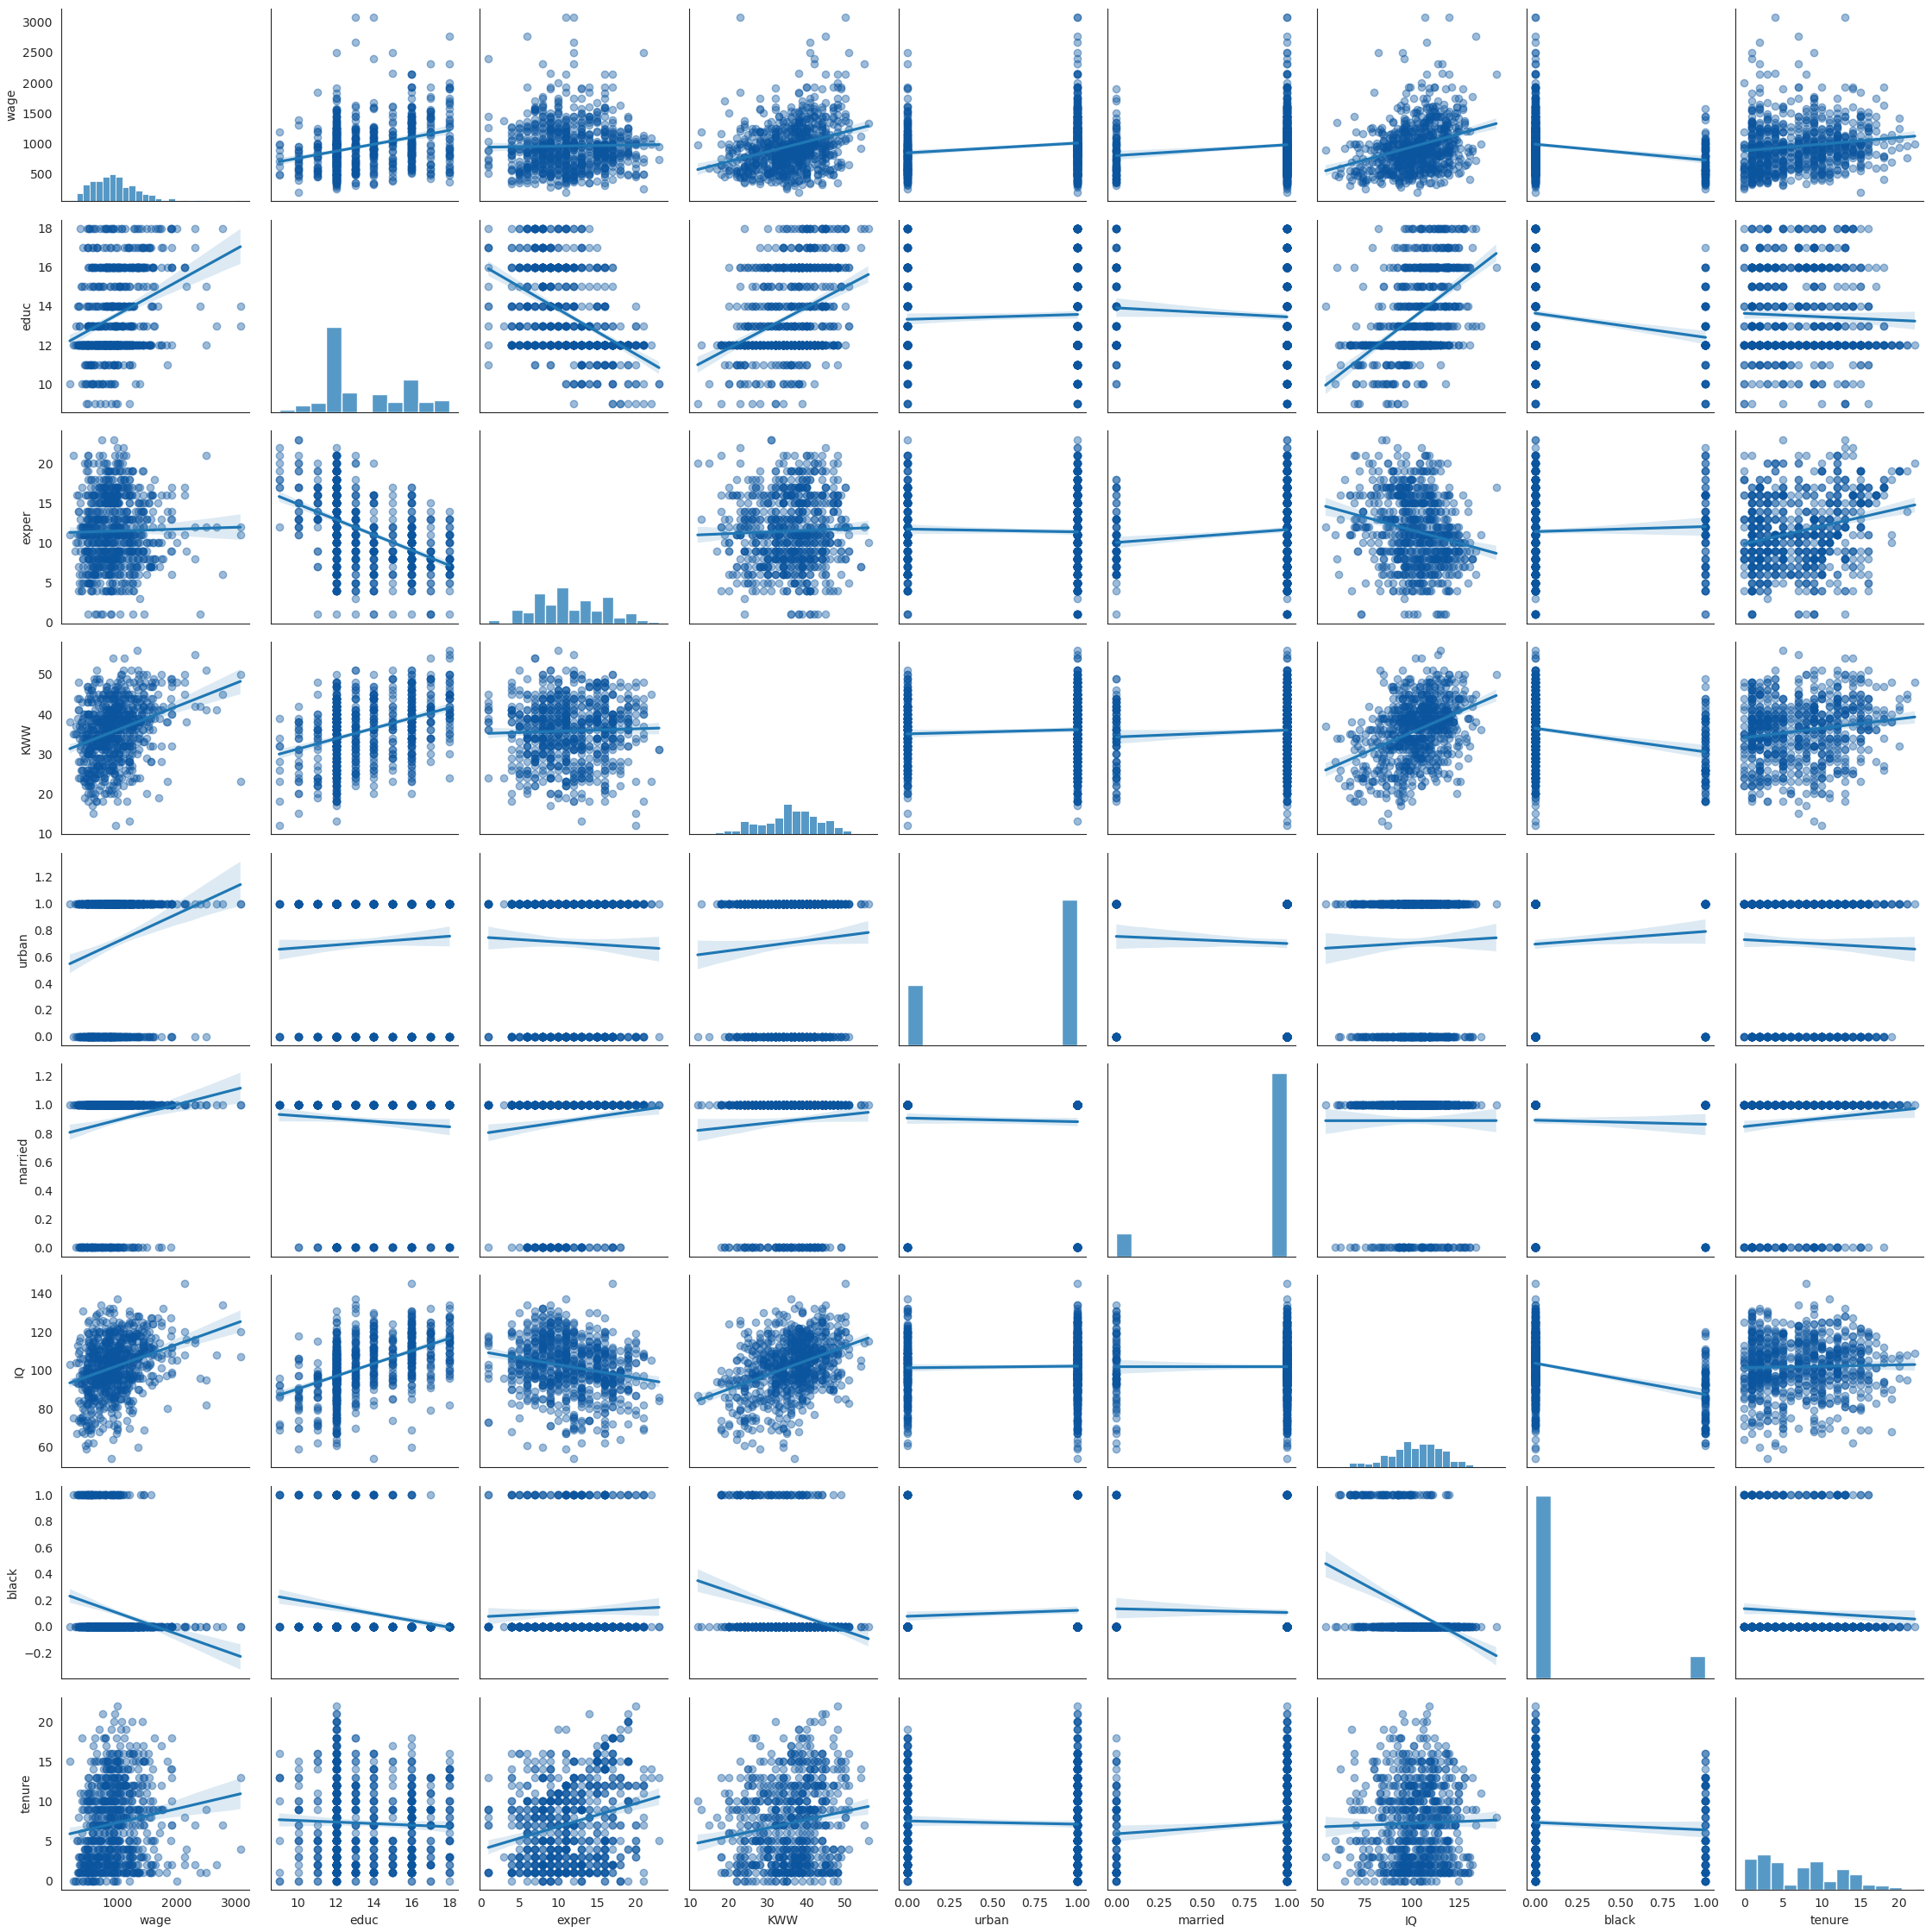

In [873]:
# Variables used in final MLR model
mlr_vars = ['wage', 'educ', 'exper', 'KWW', 'urban', 'married', 'IQ', 'black', 'tenure']

# Pairplot: Visualize scatterplots + trend lines
with sns.axes_style('white'):
    g = sns.pairplot(train[mlr_vars], kind='reg',
                     plot_kws={'scatter_kws': {'color': sns.color_palette('Blues')[-1], 'alpha': 0.4}})
plt.tight_layout()
plt.show()

/var/folders/2w/2lfvb6797ml4z9w7hbj3mf900000gn/T/ipykernel_1812/3551363360.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='urban', y='wage', data=train, palette='Blues')
/var/folders/2w/2lfvb6797ml4z9w7hbj3mf900000gn/T/ipykernel_1812/3551363360.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='married', y='wage', data=train, palette='Blues')
/var/folders/2w/2lfvb6797ml4z9w7hbj3mf900000gn/T/ipykernel_1812/3551363360.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='black', y='wage', data=train, palette='Blues')


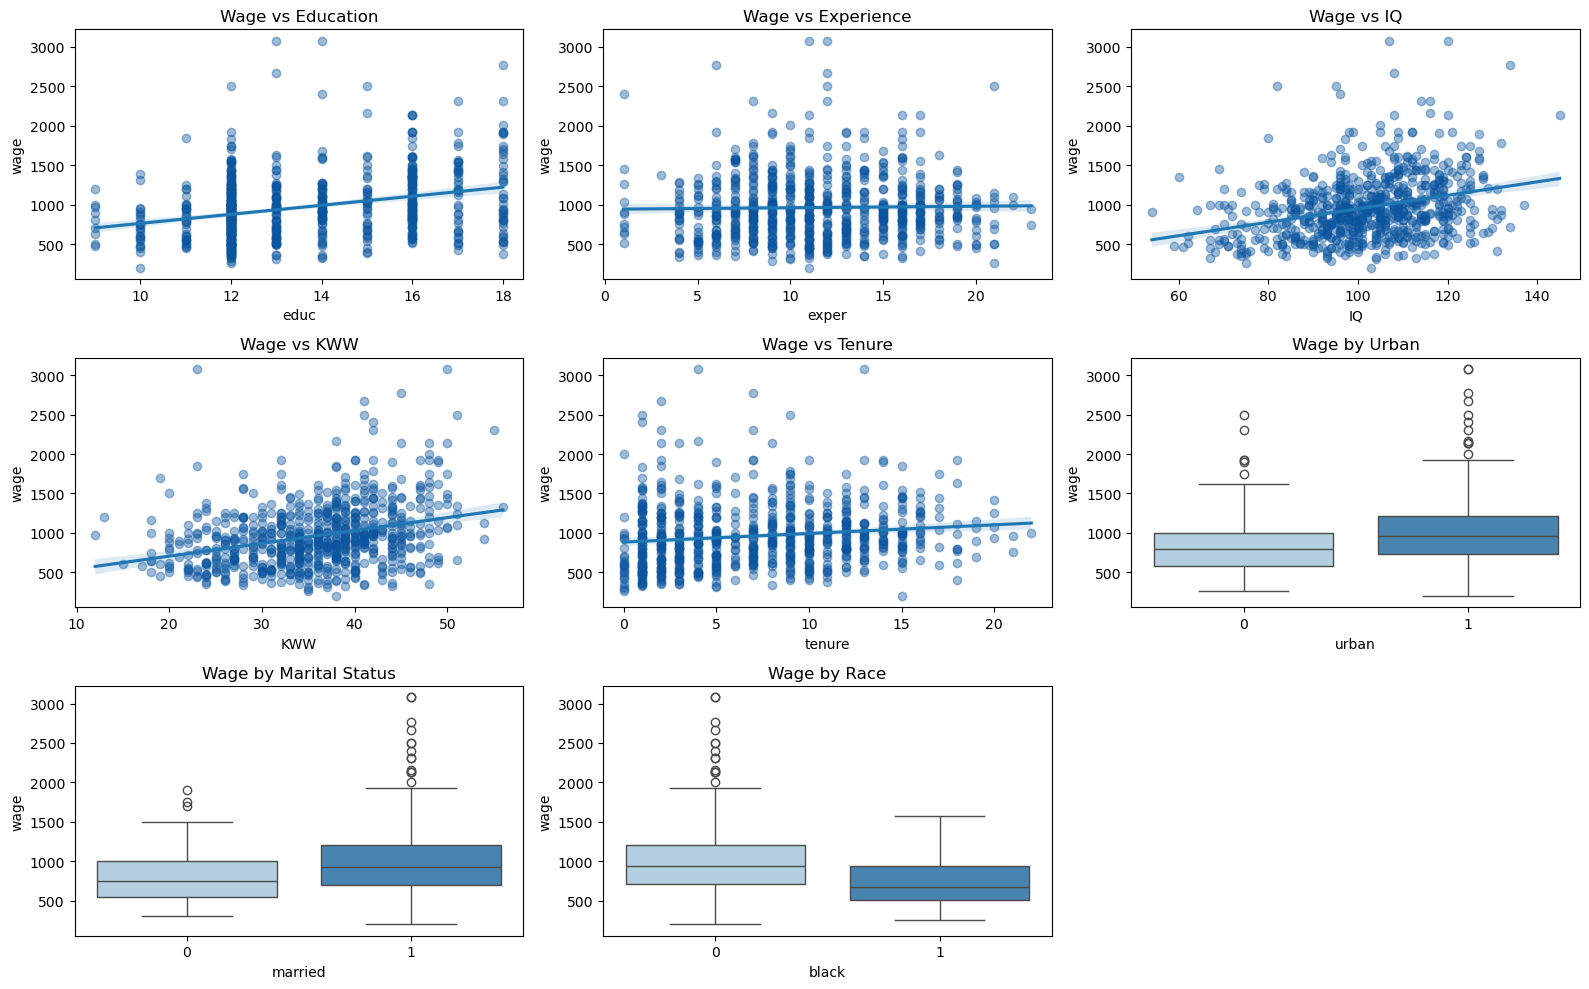

In [875]:
plt.figure(figsize=(16, 10))

# Wage vs Education
plt.subplot(3, 3, 1)
sns.regplot(x='educ', y='wage', data=train,
            scatter_kws={'color': sns.color_palette('Blues')[-1], 'alpha': 0.4})
plt.title('Wage vs Education')

# Wage vs Experience
plt.subplot(3, 3, 2)
sns.regplot(x='exper', y='wage', data=train,
            scatter_kws={'color': sns.color_palette('Blues')[-1], 'alpha': 0.4})
plt.title('Wage vs Experience')

# Wage vs IQ
plt.subplot(3, 3, 3)
sns.regplot(x='IQ', y='wage', data=train,
            scatter_kws={'color': sns.color_palette('Blues')[-1], 'alpha': 0.4})
plt.title('Wage vs IQ')

# Wage vs KWW
plt.subplot(3, 3, 4)
sns.regplot(x='KWW', y='wage', data=train,
            scatter_kws={'color': sns.color_palette('Blues')[-1], 'alpha': 0.4})
plt.title('Wage vs KWW')

# Wage vs Tenure
plt.subplot(3, 3, 5)
sns.regplot(x='tenure', y='wage', data=train,
            scatter_kws={'color': sns.color_palette('Blues')[-1], 'alpha': 0.4})
plt.title('Wage vs Tenure')

# Categorical (urban, married, black) use boxplot instead
plt.subplot(3, 3, 6)
sns.boxplot(x='urban', y='wage', data=train, palette='Blues')
plt.title('Wage by Urban')

plt.subplot(3, 3, 7)
sns.boxplot(x='married', y='wage', data=train, palette='Blues')
plt.title('Wage by Marital Status')

plt.subplot(3, 3, 8)
sns.boxplot(x='black', y='wage', data=train, palette='Blues')
plt.title('Wage by Race')

plt.tight_layout()
plt.show()


In [ ]:
LSA 2: Exogeneity

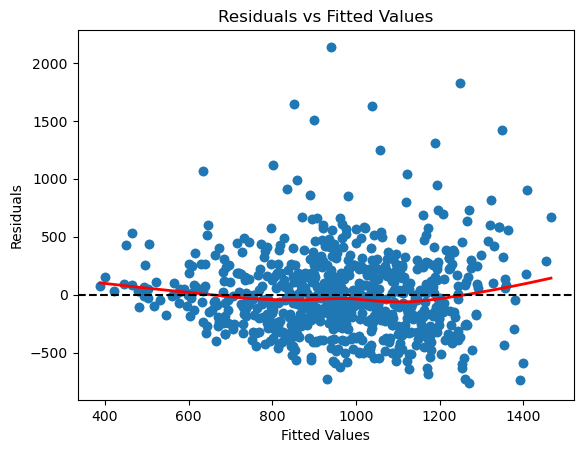

In [901]:
# Scatterplot of residuals vs fitted values
t3_fit = t3_mlr_final.fittedvalues
t3_resid = t3_mlr_final.resid

sns.regplot(x=t3_fit, y=t3_resid, lowess=True,
            scatter_kws={'s': 35, 'alpha': 0.6},
            line_kws={'color': 'red', 'linewidth': 2})
plt.scatter(t3_fit, t3_resid)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()

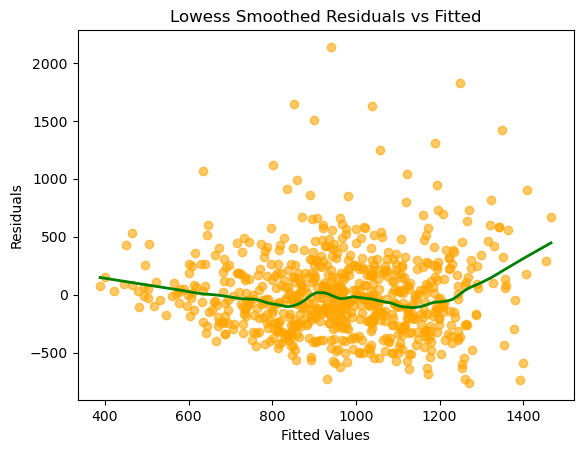

In [880]:
import statsmodels.api as sm

lowess = sm.nonparametric.lowess
plt.scatter(t3_fit, t3_resid, color='orange', alpha=0.6)
t3_z = lowess(t3_resid, t3_fit, frac=1./5)
plt.plot(t3_z[:, 0], t3_z[:, 1], color='green', linewidth=2)
plt.title("Lowess Smoothed Residuals vs Fitted")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()


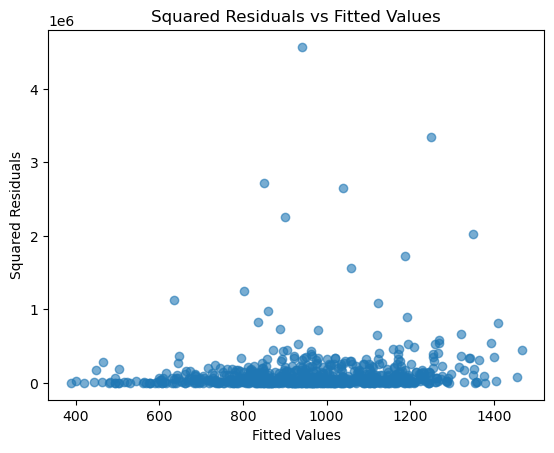

In [884]:
t3_resid2 = t3_resid ** 2

plt.scatter(t3_fit, t3_resid2, alpha=0.6)
plt.title("Squared Residuals vs Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Squared Residuals")
plt.show()


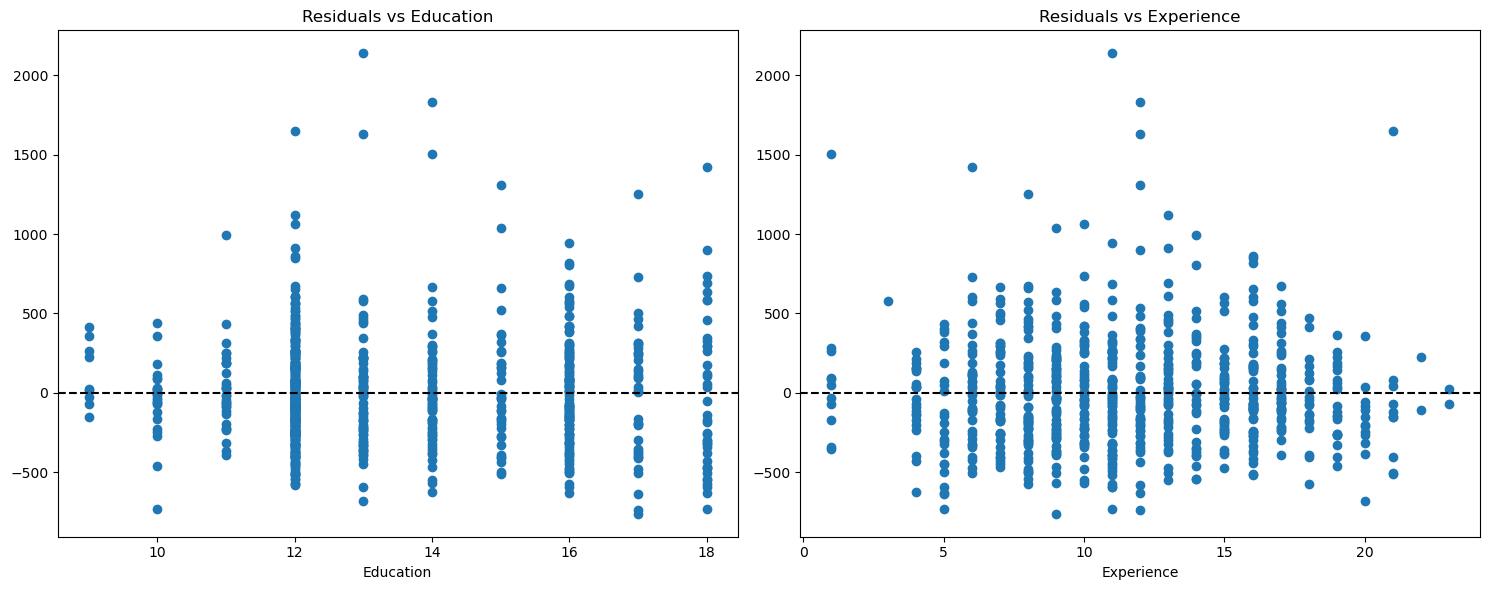

In [882]:
fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.scatter(train['educ'], t3_resid)
ax1.axhline(0, color='black', linestyle='--')
ax1.set_title("Residuals vs Education")
ax1.set_xlabel("Education")

ax2.scatter(train['exper'], t3_resid)
ax2.axhline(0, color='black', linestyle='--')
ax2.set_title("Residuals vs Experience")
ax2.set_xlabel("Experience")

plt.tight_layout()
plt.show()


LSA 3: Independence

The dataset is assumed to consist of independent observations (i.i.d.), as no clustering or repeated measures are indicated.

LSA 4: Finite 4th Moment

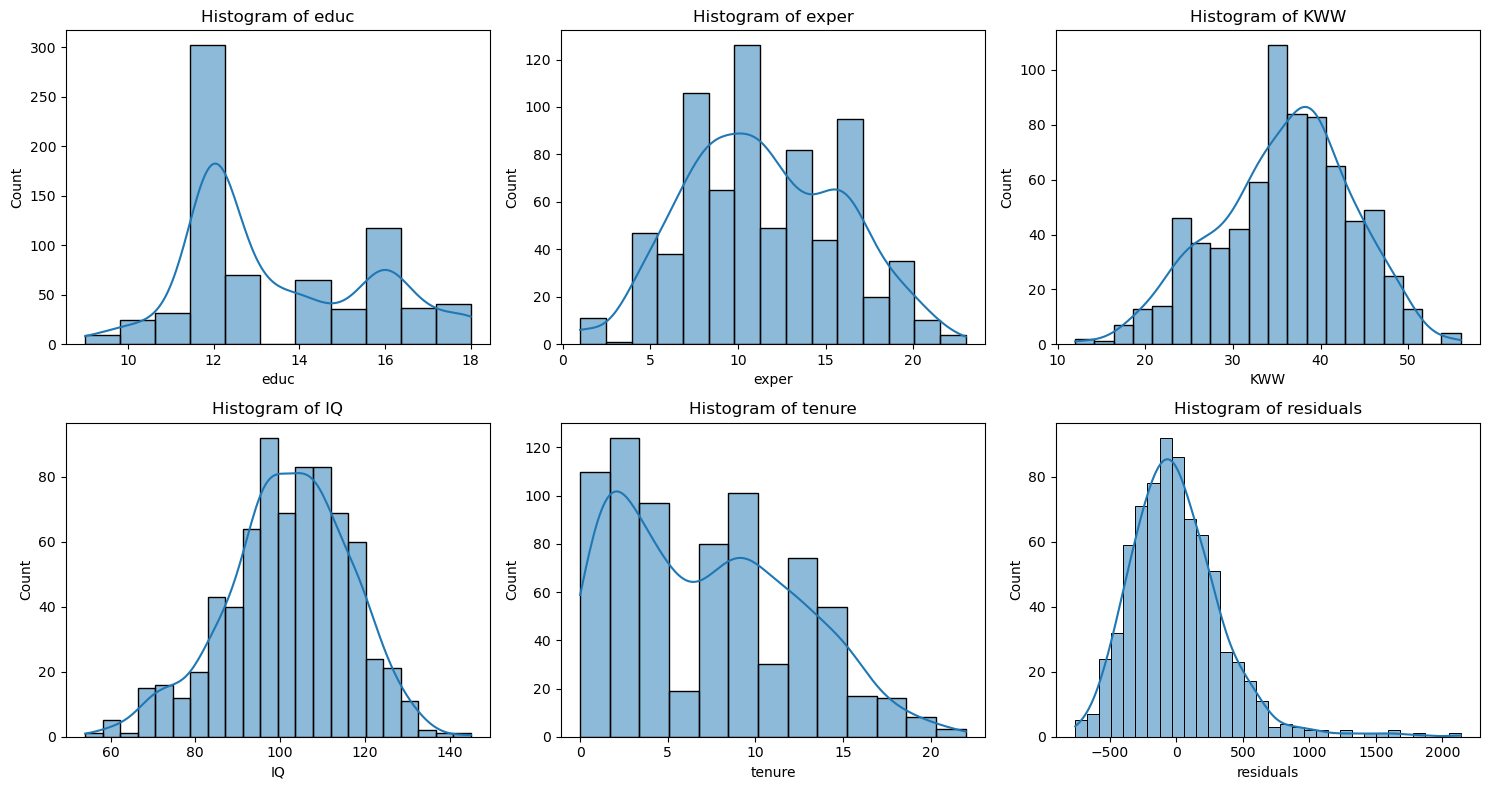

In [921]:
# Continuous variables + residuals 
numerical_vars = ['educ', 'exper', 'KWW', 'IQ', 'tenure']
plot_data = train[numerical_vars].copy()
plot_data['residuals'] = t3_resid

# Plot histograms
fig, axes = plt.subplots(2, 3, figsize=(15, 8)) 
axes = axes.flatten()

for i, var in enumerate(plot_data.columns):
    sns.histplot(plot_data[var], kde=True, ax=axes[i])
    axes[i].set_title(f"Histogram of {var}")
    axes[i].set_xlabel(var)

plt.tight_layout()
plt.savefig("lsa4_histograms_mlr_continuous.png", dpi=300)
plt.show()

LSA 5: No Perfect Collinearity

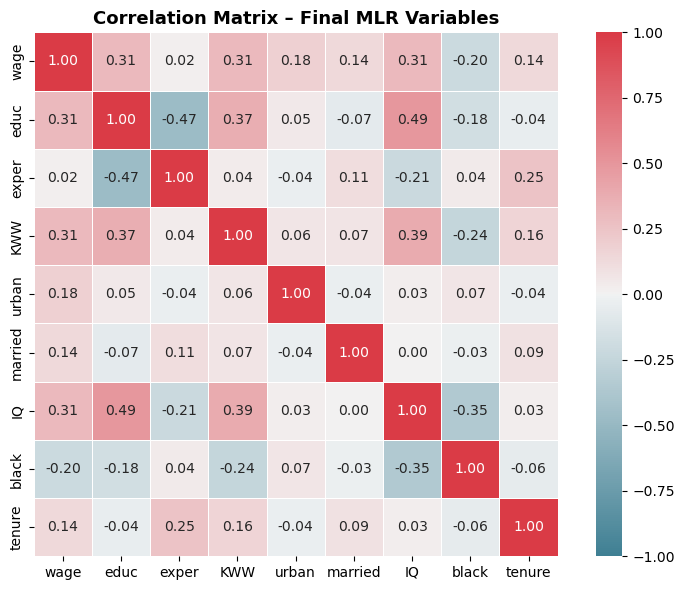

In [895]:

# Variables used in MLR model
mlr_vars = ['wage', 'educ', 'exper', 'KWW', 'urban', 'married', 'IQ', 'black', 'tenure']

# Compute correlation matrix
fig, ax = plt.subplots(figsize=(8, 6))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(train[mlr_vars].corr(),
            vmax=1, vmin=-1, center=0,
            square=True, linewidths=0.5, annot=True, fmt='.2f',
            cmap=cmap, ax=ax)

ax.set_title('Correlation Matrix – Final MLR Variables', fontweight='bold', fontsize=13)
plt.tight_layout()
plt.savefig('t3_mlr_correlation_matrix.png', dpi=300)
plt.show()

LSA 6: Homoskedasticity

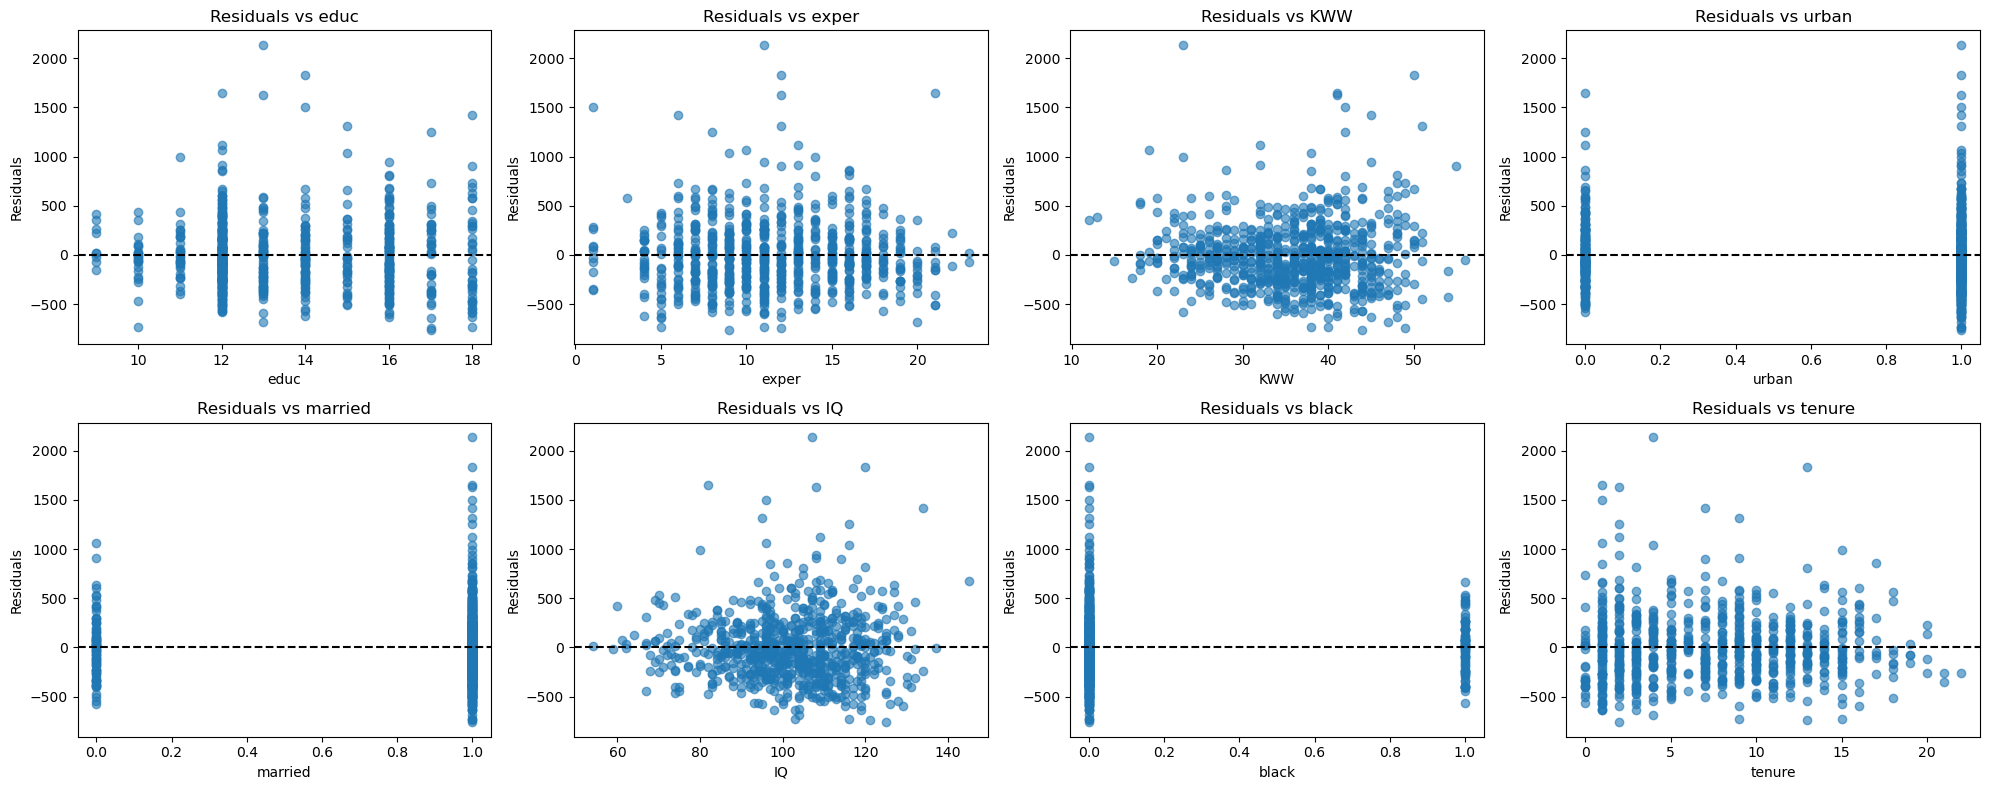

In [897]:
# Residuals from Task 3 model
t3_resid = t3_mlr_final.resid

# Predictor variables from the final model
predictors = ['educ', 'exper', 'KWW', 'urban', 'married', 'IQ', 'black', 'tenure']

# Create subplots: 2 rows × 4 columns for 8 predictors
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
axes = axes.flatten()

# Loop through variables and create scatter plots
for i, var in enumerate(predictors):
    axes[i].scatter(train[var], t3_resid, alpha=0.6)
    axes[i].axhline(0, color='black', linestyle='--')
    axes[i].set_title(f"Residuals vs {var}")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Residuals")

plt.tight_layout()
plt.savefig("lsa6_residuals_vs_predictors.png", dpi=300)
plt.show()


In [909]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 1. Define your predictor variables
predictors = ['educ', 'exper', 'KWW', 'urban', 'married', 'IQ', 'black', 'tenure']

# 2. Add constant for intercept
X = train[predictors]
X = sm.add_constant(X)

# 3. Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# 4. Display the VIF table
print(vif_data)

  Variable         VIF
0    const  116.517412
1     educ    1.811072
2    exper    1.462016
3      KWW    1.378618
4    urban    1.016170
5  married    1.025257
6       IQ    1.536760
7    black    1.172122
8   tenure    1.101848


# **Task 4**

In [807]:
model = smf.ols('lwage ~ educ + exper + hours + age + urban', data=train).fit(cov_type = 'HC0')
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     33.48
Date:                Thu, 22 May 2025   Prob (F-statistic):           8.41e-31
Time:                        13:31:09   Log-Likelihood:                -317.66
No. Observations:                 733   AIC:                             647.3
Df Residuals:                     727   BIC:                             674.9
Df Model:                           5                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3235      0.199     26.708      0.000       4.933       5.714
educ           0.0725      0.008      9.118      0.000       0.057       0.088
exper          0.0163      0.004      3.678      0.000       0.008       0.025
hours         -0.0049      0.002     -2.081      0.037      -0.009      -0.000
age            0.0119      0.005      2.204      0.028       0.001       0.023
urban          0.1670      0.030      5.497      0.000       0.107       0.227
==============================================================================
Omnibus:                        8.494   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                9.616
Skew:                          -0.177   Prob(JB):                      0.00816
Kurtosis:                       3.436   Cond. No.                         804.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

In [808]:
model = smf.ols('lwage ~ educ + exper + hours + age + urban + hours:age + educ:urban', data=train).fit(cov_type = 'HC0')
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     24.49
Date:                Thu, 22 May 2025   Prob (F-statistic):           4.81e-30
Time:                        13:31:09   Log-Likelihood:                -314.12
No. Observations:                 733   AIC:                             644.2
Df Residuals:                     725   BIC:                             681.0
Df Model:                           7                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.5851      0.994      7.630      0.000       5.637       9.534
educ           0.0608      0.013      4.784      0.000       0.036       0.086
exper          0.0164      0.004      3.717      0.000       0.008       0.025
hours         -0.0526      0.022     -2.379      0.017      -0.096      -0.009
age           -0.0522      0.029     -1.772      0.076      -0.110       0.006
urban         -0.0452      0.190     -0.238      0.812      -0.417       0.327
hours:age      0.0015      0.001      2.181      0.029       0.000       0.003
educ:urban     0.0154      0.014      1.092      0.275      -0.012       0.043
==============================================================================
Omnibus:                        7.384   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.025   Jarque-Bera (JB):                7.711
Skew:                          -0.188   Prob(JB):                       0.0212
Kurtosis:                       3.332   Cond. No.                     9.87e+04
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 9.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This regression model predicts log(wage) (lwage) based on education, experience, hours worked, age, urban status, and two interaction terms (hours:age and educ:urban). It was estimated using heteroskedasticity-robust standard errors.

We use log wage instead of raw wage to improve both the accuracy and interpretability of the model. Taking the logarithm helps correct for the skewed distribution of wages and stabilizes the variance of the errors, which makes the regression assumptions more valid. It also allows us to interpret the coefficients in percentage terms, which is more intuitive 

We tested the interaction between age and hours worked (age:hours) to investigate whether the relationship between working hours and wage varies over the course of an individual’s life. This was motivated by the idea that older workers may experience different returns to work intensity than younger workers, for example, due to seniority, managerial roles, or flexible work arrangements.

This interaction was directly aligned with Goal (b), which is to build an optimal predictive model of wages. Including age:hours allowed us to test for nonlinear, real-world effects that could improve model accuracy. It turned out to be statistically significant and improved the model’s adjusted R² by 0.6, confirming that age meaningfully modifies the impact of hours worked on wage outcomes. Its inclusion improved the predictive performance and explanatory value of the model.

While working more hours is generally associated with lower log wages, possibly reflecting lower-paying or hourly work, the interaction shows that this negative association is weaker for older workers. This may reflect the fact that older individuals are more likely to hold senior, salaried, or managerial positions, where additional hours do not imply lower hourly wages and may even be better compensated.

We also tested educ:urban to examine whether the return to education differs by location, but this interaction was not statistically significant (p = 0.27). This indicates that, in our sample, the wage premium from education is fairly consistent across urban and non-urban settings.

The model explains approximately 17.8% of the variation in log-wage and supports the use of both main effects and limited interaction terms to balance predictive power and parsimony.

The test has hypotheses:

$H_0: \,\, \beta_1=\beta_2=\beta_3=\beta_4=\beta_5=\beta_6=\beta_7=0$

vs $H_1: \,\, \text{at least one of the 7 slopes } \neq 0 $

I choose $\alpha=0.05$ as standard. I assume MLR LSA 1-5 (not LSA 6). The test statistic is $F_{stat} = 24.49$ which follows an $F_{7,n-8} = F_{7, 725}$ distribution under the null hypothesis. The p-value is $P(F_{7, 725} > 24.49) = 4.81 \times 10^{-30} \approx 0$. Since the p-value $0 < 0.05$ we reject the null and conclude that at least one of the slopes is significantly different to zero.

In [811]:
model = smf.ols('lwage ~ educ + exper + hours + age  + hours:age', data=train).fit(cov_type = 'HC0')
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     23.96
Date:                Thu, 22 May 2025   Prob (F-statistic):           2.36e-22
Time:                        13:31:09   Log-Likelihood:                -328.68
No. Observations:                 733   AIC:                             669.4
Df Residuals:                     727   BIC:                             696.9
Df Model:                           5                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.9318      0.996      7.963      0.000       5.980       9.884
educ           0.0733      0.008      9.174      0.000       0.058       0.089
exper          0.0165      0.004      3.707      0.000       0.008       0.025
hours         -0.0611      0.022     -2.727      0.006      -0.105      -0.017
age           -0.0650      0.030     -2.179      0.029      -0.123      -0.007
hours:age      0.0017      0.001      2.555      0.011       0.000       0.003
==============================================================================
Omnibus:                        6.717   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                6.714
Skew:                          -0.197   Prob(JB):                       0.0348
Kurtosis:                       3.254   Cond. No.                     9.76e+04
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 9.76e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""